In [8]:
# 라이브러리 불러오기
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# matplotlib 스타일 중, 'seaborn' 스타일 사용
plt.style.use('seaborn')

#데이터 불러오기
test_dt = pd.read_csv('/test.csv')
train_dt = pd.read_csv('/Users/wizdom/Desktop/옮길거/개발자/데분 스터디/Untitled Folder/titanic/train.csv')
gender_dt = pd.read_csv('/Users/wizdom/Desktop/옮길거/개발자/데분 스터디/Untitled Folder/titanic/gender_submission.csv')

In [18]:
# 데이터 확인하기
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# na값 확인하기
# 열마다 확인하면서 na값이 몇개인지 보여준다.
print(train_dt.apply(lambda x : pd.isna(x).sum()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
# na 비율 구하기 (소수점 2자리까지 나타내기)
# shape[0]--> 인 이유는 row갯수
print(round(train_dt.apply(lambda x : pd.isna(x).sum())/train_dt.shape[0]*100 , 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [25]:
# 기초통계량 구하기
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# null값 개수와 타입보기 ! !
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# y값(survived)에 대한 분포 
train_dt["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
train_dt.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [69]:
train_dt['Age_cut'] = 0
train_dt['Age_cut'] = pd.cut(train_dt['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 80],
                            labels=['10s','20s', '30s', '40s', '50s', '60s', '70over'])

In [82]:
train_dt.groupby(['Age_cut', 'Survived'])['Survived'].count()

Age_cut  Survived
10s      0            85
         1            79
20s      0           143
         1            77
30s      0            94
         1            73
40s      0            55
         1            34
50s      0            28
         1            20
60s      0            13
         1             6
70over   0             6
         1             1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

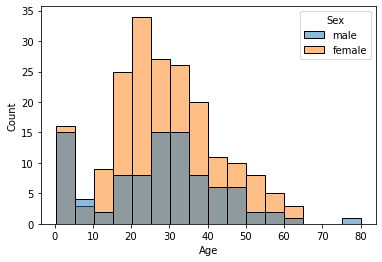

In [105]:
import seaborn as sns

sns.histplot(x=train_dt[train_dt['Survived']==1]['Age'], hue='Sex', data=train_dt)